In [1]:
# load required libraries
options(stringsAsFactors = F)
options (warn = -1)
suppressPackageStartupMessages({
library(Seurat)
library(ggplot2)
library(dplyr)
library(Matrix)
library(Hmisc)
library(RColorBrewer)
library(ggrepel)
library(tidyr)
})
set.seed(123)

In [3]:
# load samples
sample <- CreateSeuratObject(Read10X_h5("matrix/filtered_feature_bc_matrix.h5"), project = "CTRL220424")
sample
head(sample@meta.data)

An object of class Seurat 
33538 features across 18927 samples within 1 assay 
Active assay: RNA (33538 features, 0 variable features)

,orig.ident,nCount_RNA,nFeature_RNA
,<fct>,<dbl>,<int>
AAACCCAAGCCTCATA-1,CTRL220424,9764,3464
AAACCCAAGTAAGCAT-1,CTRL220424,1733,1088
AAACCCAAGTGCAGCA-1,CTRL220424,1416,998
AAACCCACAAGAATAC-1,CTRL220424,1613,1091
AAACCCACACAGAGAC-1,CTRL220424,18592,5507
AAACCCACACATATCG-1,CTRL220424,5711,2554


In [3]:
# save the raw sample
saveRDS(sample, file = "./rds/CTRL220424_raw.rds")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ lubridate 1.9.3     ✔ stringr   1.5.0
✔ purrr     1.0.2     ✔ tibble    3.2.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand()    masks Matrix::expand()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::lag()       masks stats::lag()
✖ tidyr::pack()      masks Matrix::pack()
✖ Hmisc::src()       masks dplyr::src()
✖ Hmisc::summarize() masks dplyr::summarize()
✖ tidyr::unpack()    masks Matrix::unpack()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
17:09:01 UMAP embedding parameters a = 0.9922 b = 1.112

17:09:01 Read 18927 rows and found 30 numeric columns

17:09:01 Using Annoy for neighbor search, n_neighbors = 30

17:09:01 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|--

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 18927
Number of edges: 649810

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9354
Number of communities: 18
Elapsed time: 2 seconds


Loading required package: fields

Loading required package: spam

Spam version 2.9-1 (2022-08-07) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.


Attaching package: ‘spam’


The following object is masked from ‘package:Matrix’:

    det


The following objects are masked from ‘package:base’:

    backsolve, forwardsolve


Loading required package: viridisLite


Try help(fields) to get started.


Attaching package: ‘fields’


The following object is masked from ‘package:Hmisc’:

    describe




[1] "Creating artificial doublets for pN = 5%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 10%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 15%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 20%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 25%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 30%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."


Loading required package: KernSmooth

KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009

Loading required package: ROCR



NULL
[1] "Creating 6309 artificial doublets..."
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Computing pANN..."
[1] "Classifying doublets.."


An object of class Seurat 
33538 features across 17704 samples within 1 assay 
Active assay: RNA (33538 features, 0 variable features)

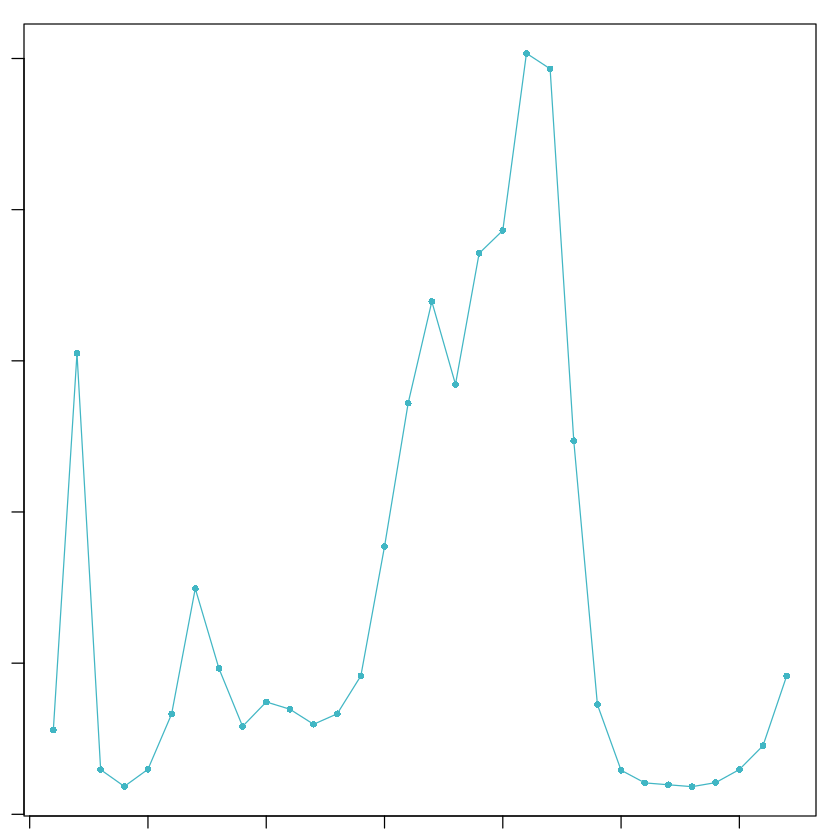

In [4]:
# remove doublets
source("../scripts/dedoublet.R")
sample <- dedoublet(sample)
sample
saveRDS(sample, file = "./rds/CTRL220424_dedoublets.rds")

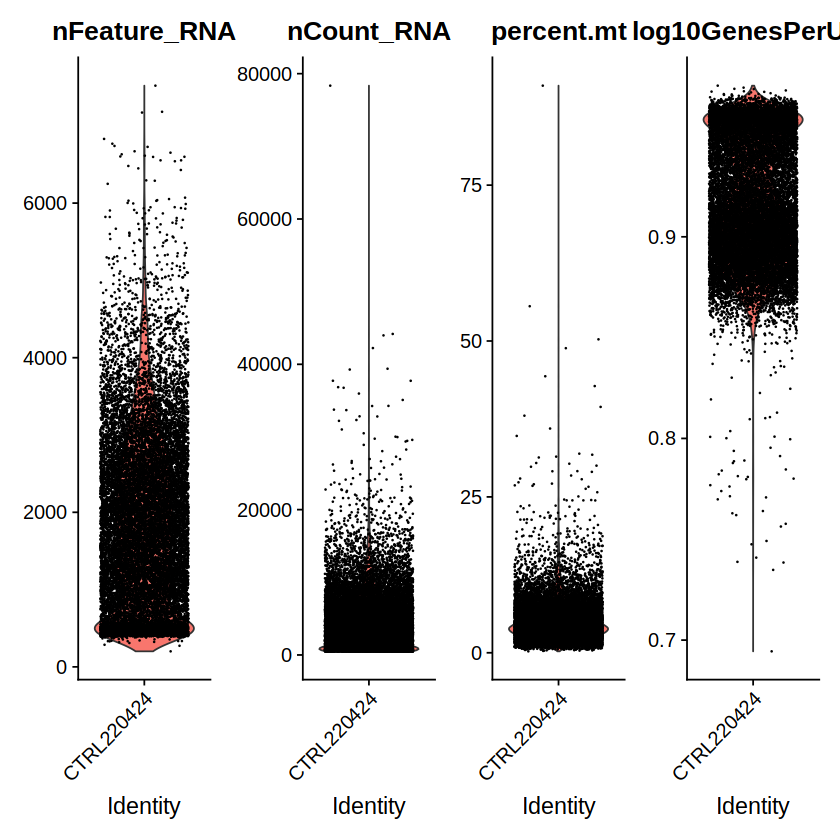

In [5]:
# count mitochondrial gene percentage and make plots
sample[["percent.mt"]] <- PercentageFeatureSet(sample, pattern = "^MT-")
sample$log10GenesPerUMI <- log10(sample$nFeature_RNA) / log10(sample$nCount_RNA)
VlnPlot(sample, features = c("nFeature_RNA", "nCount_RNA", "percent.mt", "log10GenesPerUMI"), ncol = 4, pt.size = 0.1)

In [6]:
# save the sample after nFeature_RNA & mito filtering
sample <- subset(sample, nFeature_RNA >= 500 & percent.mt <= 10)
saveRDS(sample, file = "rds/CTRL220424_clean.rds")

[1] 33538 14432

[1] 2000

Centering and scaling data matrix



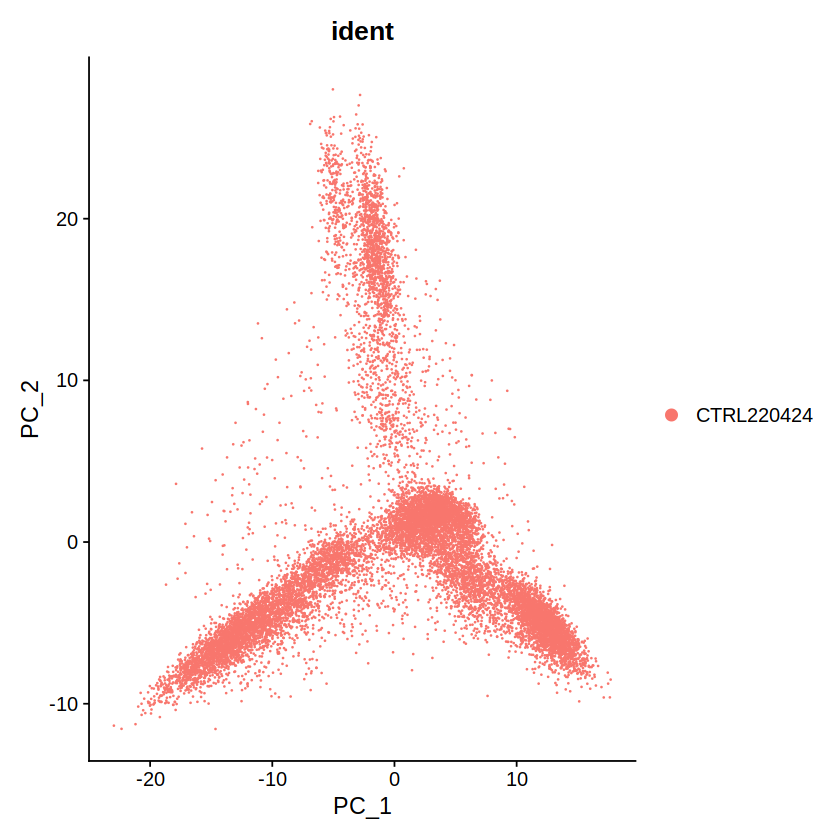

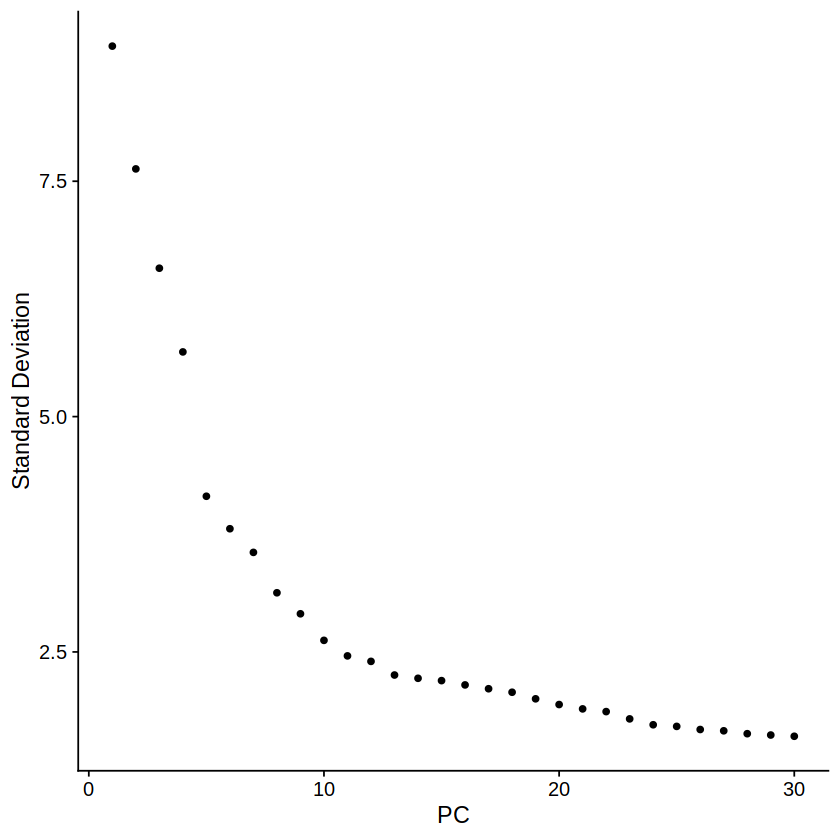

In [8]:
# filter cells and normalize data
sample <- NormalizeData(sample, normalization.method = "LogNormalize", scale.factor = 10000)
dim(GetAssayData(sample, slot = "counts"))

# find variable genes and scale data by number of UMIs and mitochondrial gene percentage
sample <- FindVariableFeatures(sample, selection.method = "vst")
length(sample@assays$RNA@var.features)
sample <- ScaleData(sample)

# run PCA and elbowplot
sample <- RunPCA(sample, verbose = FALSE)
DimPlot(sample, reduction = "pca", group.by = "ident")
ElbowPlot(sample, ndims = 30)

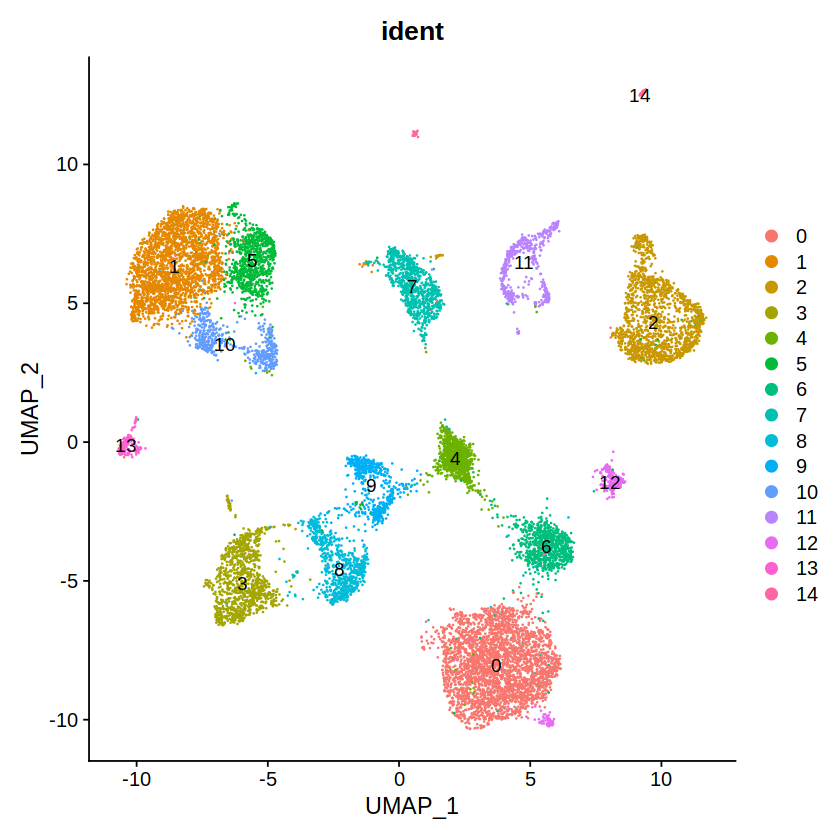

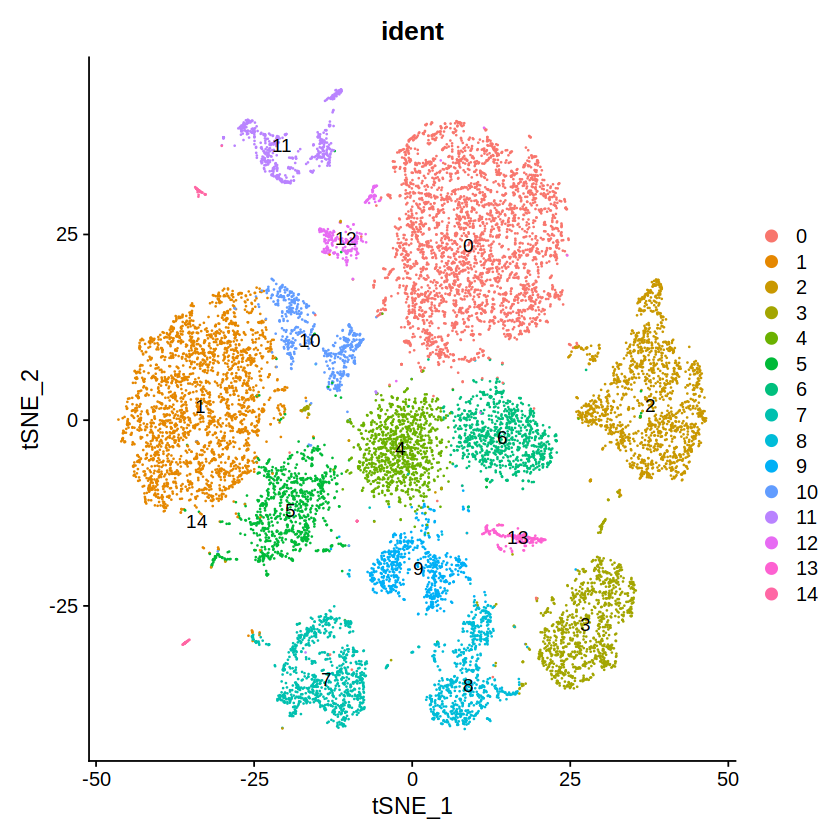

In [9]:
# dimension reduction
pca_dims <- 1:30
sample <- RunTSNE(sample, dims = pca_dims, verbose = FALSE)
sample <- RunUMAP(sample, dims = pca_dims, verbose = FALSE)
sample <- FindNeighbors(sample, dims = pca_dims, verbose = FALSE)
sample <- FindClusters(sample, resolution = 0.5, verbose = FALSE)

# make DM plots
DimPlot(sample, label = TRUE, reduction = "umap", group.by = "ident")
DimPlot(sample, label = TRUE, reduction = "tsne", group.by = "ident")

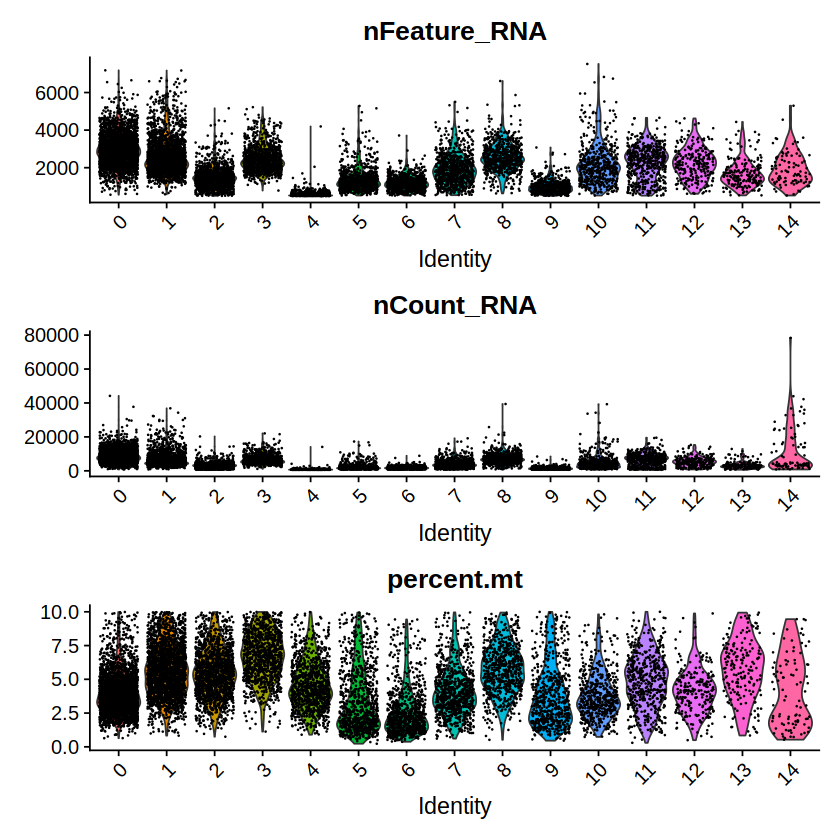

In [10]:
# quality control by cluster
VlnPlot(sample, features = c("nFeature_RNA","nCount_RNA","percent.mt"), group.by = "seurat_clusters", ncol = 1, pt.size = 0.1)
ggsave("figure/qc_sample_by_cluster.pdf", width = 10, height = 10)

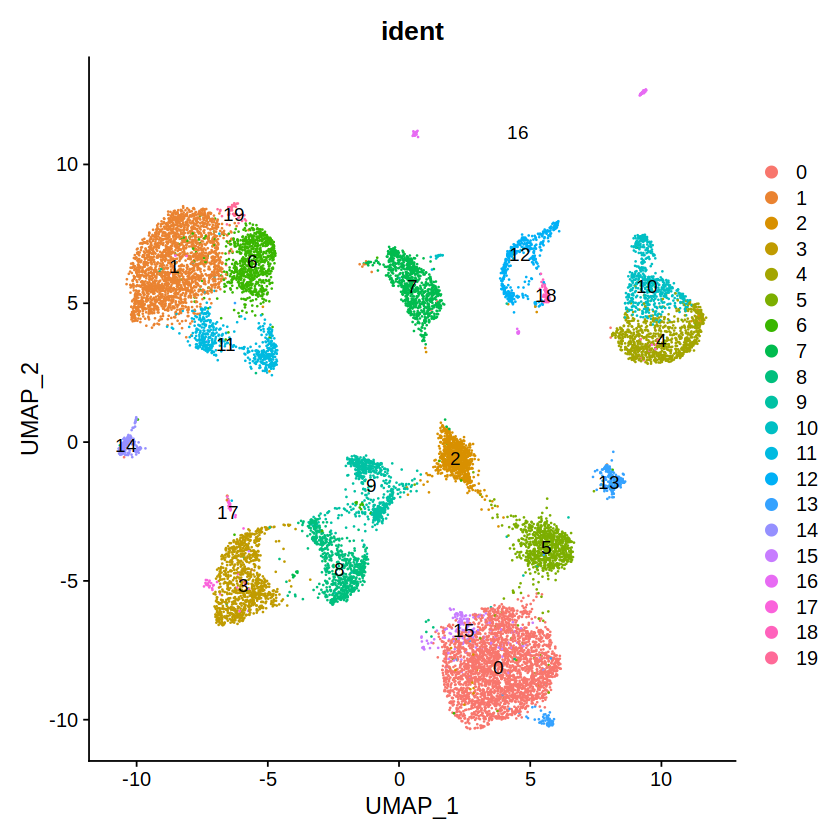

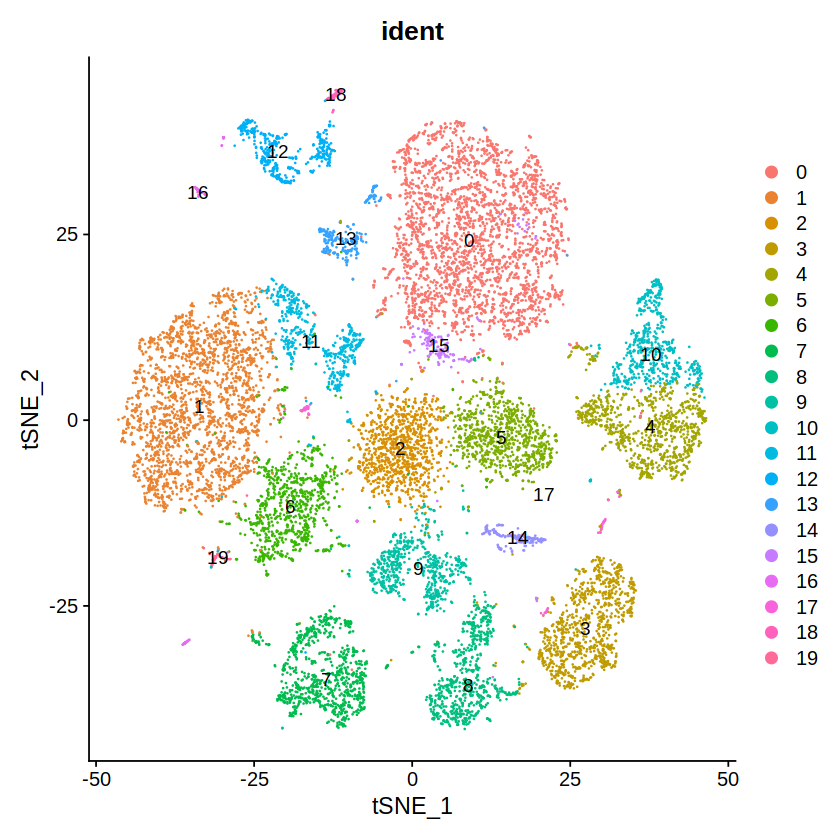

In [11]:
# add resolution
sample <- FindClusters(sample, resolution = 1, verbose = FALSE)
DimPlot(sample, label = TRUE, reduction = "umap", group.by = "ident")
DimPlot(sample, label = TRUE, reduction = "tsne", group.by = "ident")

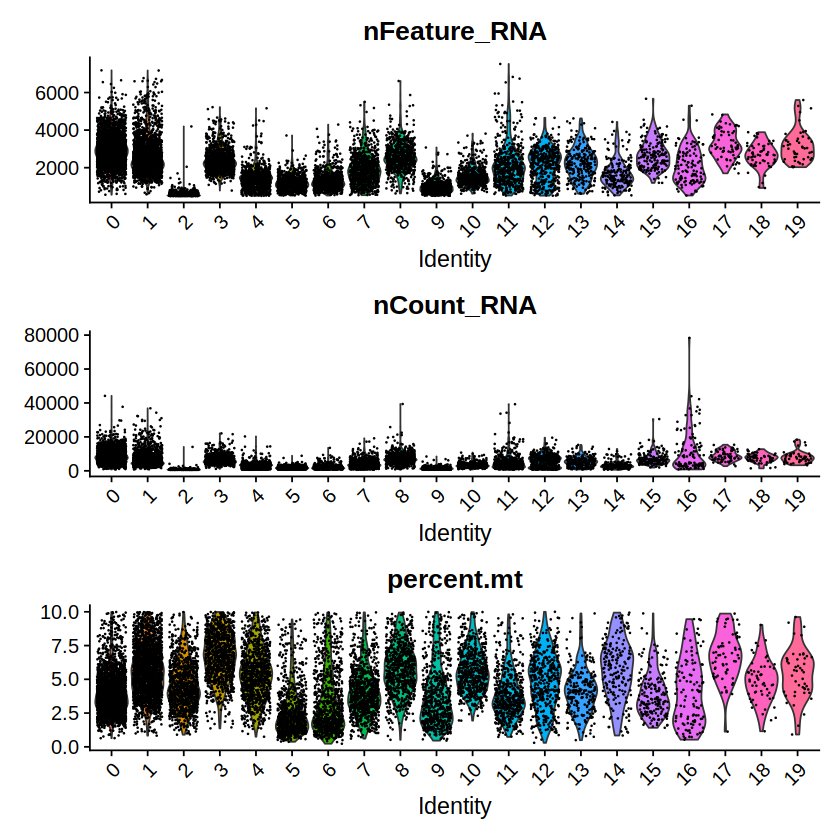

In [12]:
# quality control by cluster
VlnPlot(sample, features = c("nFeature_RNA","nCount_RNA","percent.mt"), group.by = "seurat_clusters", ncol = 1, pt.size = 0.1)
ggsave("figure/qc_sample_by_cluster_res1.pdf", width = 10, height = 10)

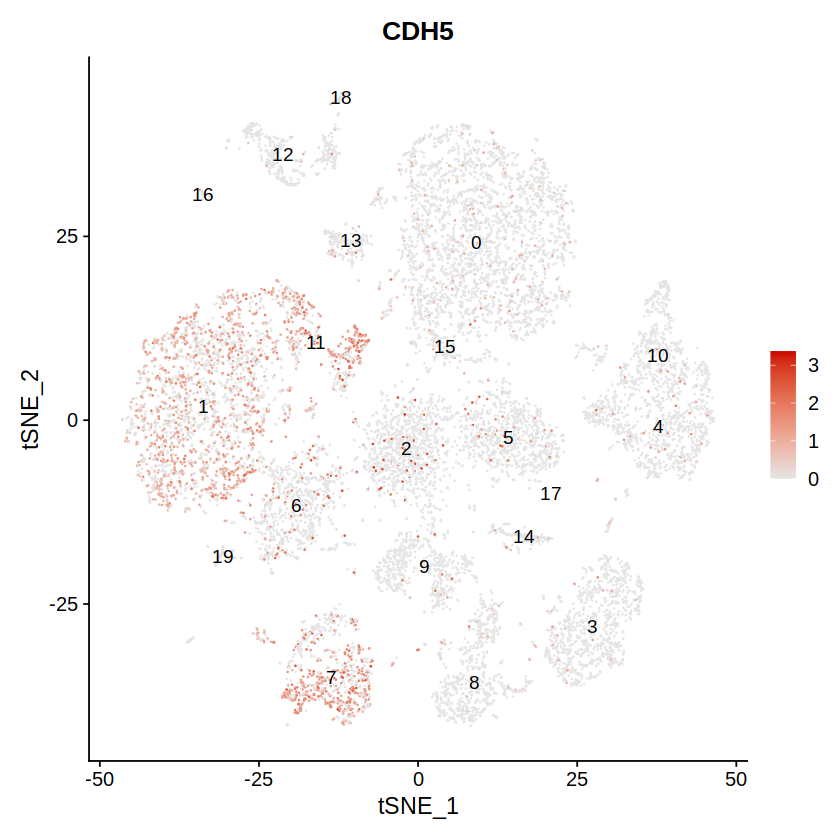

In [15]:
# explore marker genes
FeaturePlot(sample, label = T, features=c("CDH5"), cols=c("grey90","red3"), reduction="tsne", pt.size = 0.1)

In [17]:
# save the clustered sample
saveRDS(sample, file = "rds/CTRL220424_clean_clustered.rds")

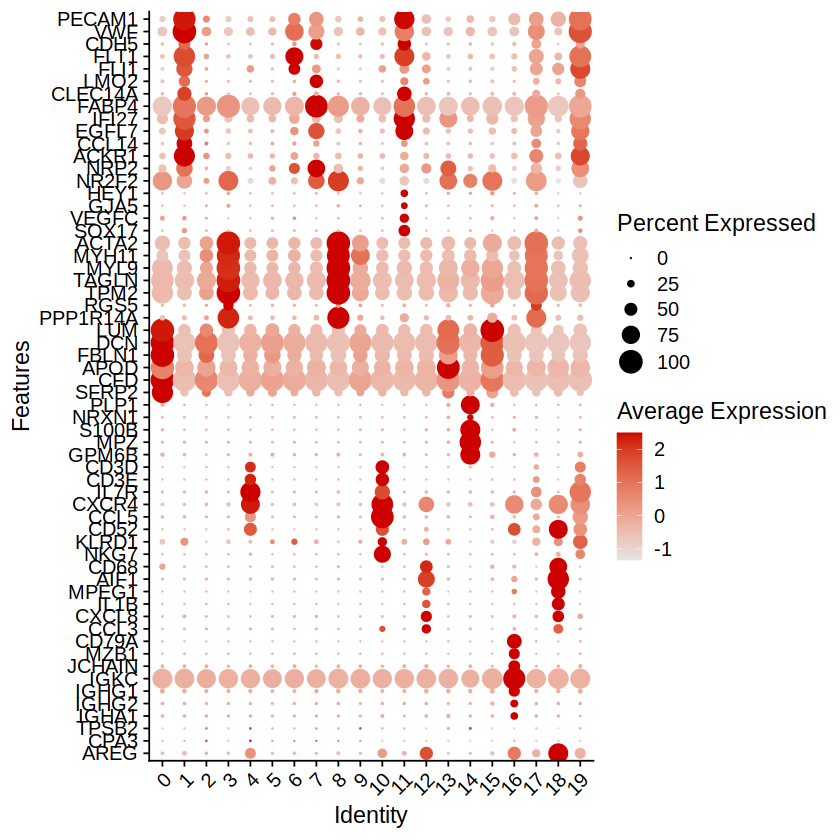

In [16]:
# plot marker genes list
markers <- unique(c("PECAM1","VWF","CDH5","FLT1","FLI1","LMO2","CLEC14A","FABP4","IFI27","EGFL7", # EC
"CCL14","ACKR1","NRP2","NR2F2", # VEC
"HEY1","GJA5","VEGFC","SOX17", # AEC
"ACTA2","MYH11","MYL9","TAGLN","TPM2","RGS5","PPP1R14A", # SMC
"ACTA2","MYH11","LUM","DCN","PPP1R14A", # MyoFB
"LUM","DCN","FBLN1","APOD","CFD","SFRP2", # FB
"PLP1","NRXN1","S100B","MPZ","GPM6B", # OLG
"CD3D","CD3E","IL7R","CXCR4","CCL5","CD52", # T
"KLRD1","NKG7","CCL5", # NK
"CD68","AIF1","MPEG1","IL1B","CXCL8","CCL3","CXCR4", # Macrophage
"CD79A","MZB1","JCHAIN","IGKC","IGHG1","IGHG2","IGHA1", # B
"TPASB1","TPSB2","CPA3","AREG","HPGD5")) # Mast
DotPlot(sample, features=rev(markers), cols=c("grey90","red3"), group.by="seurat_clusters") + coord_flip() + theme(axis.text.x=element_text(angle=45, hjust=1))
ggsave("figure/dotplot_CAD_markers.pdf", width = 18, height = 12)